In [15]:
#Import the requried library
import pandas as pd

# Load each dataset
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products_prior.csv')
order_products_train = pd.read_csv('order_products_train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Display the first few rows of each DataFrame to ensure they are loaded correctly
print('Aisles:')
print(aisles.head(), '\n')
print('Departments:')
print(departments.head(), '\n')
print('Order Products Prior:')
print(order_products_prior.head(), '\n')
print('Order Products Train:')
print(order_products_train.head(), '\n')
print('Orders:')
print(orders.head(), '\n')
print('Products:')
print(products.head(), '\n')
print('Sample Submission:')
print(sample_submission.head(), '\n')


Aisles:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation 

Departments:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol 

Order Products Prior:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0 

Order Products Train:
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246            

In [5]:
!pip install apyori


In [8]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   --------------- ------------------------ 0.6/1.4 MB 4.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.4 MB/s eta 0:00:00


In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Merge product names into the order_products_train dataframe
merged_df = pd.merge(order_products_train, products, on='product_id', how='left')

# Group by order_id and aggregate the product names
transactions = merged_df.groupby('order_id')['product_name'].apply(list).tolist()


In [12]:
# Initialize TransactionEncoder
encoder = TransactionEncoder()
encoded_array = encoder.fit_transform(transactions)
encoded_df = pd.DataFrame(encoded_array, columns=encoder.columns_)

# Take a look at the encoded DataFrame
print(encoded_df.head())


   #2 Coffee Filters  #2 Cone White Coffee Filters  #2 Mechanical Pencils  \
0              False                         False                  False   
1              False                         False                  False   
2              False                         False                  False   
3              False                         False                  False   
4              False                         False                  False   

   #4 Natural Brown Coffee Filters  & Go! Hazelnut Spread + Pretzel Sticks  \
0                            False                                   False   
1                            False                                   False   
2                            False                                   False   
3                            False                                   False   
4                            False                                   False   

   +Energy Black Cherry Vegetable & Fruit Juice  \
0                

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the apriori algorithm to find frequent itemsets
# Adjust the min_support as needed
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)

# View the frequent itemsets
print(frequent_itemsets.head())


    support                    itemsets
0  0.017514    (100% Whole Wheat Bread)
1  0.011737       (2% Reduced Fat Milk)
2  0.017163  (Apple Honeycrisp Organic)
3  0.029480                 (Asparagus)
4  0.117980    (Bag of Organic Bananas)


In [14]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# View the generated rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                 antecedents               consequents   support  confidence  \
0   (Bag of Organic Bananas)    (Organic Baby Spinach)  0.017042    0.144444   
1     (Organic Baby Spinach)  (Bag of Organic Bananas)  0.017042    0.228536   
2   (Bag of Organic Bananas)    (Organic Hass Avocado)  0.018444    0.156331   
3     (Organic Hass Avocado)  (Bag of Organic Bananas)  0.018444    0.331825   
4   (Bag of Organic Bananas)     (Organic Raspberries)  0.013566    0.114987   
5      (Organic Raspberries)  (Bag of Organic Bananas)  0.013566    0.320952   
6     (Organic Strawberries)  (Bag of Organic Bananas)  0.023428    0.282174   
7   (Bag of Organic Bananas)    (Organic Strawberries)  0.023428    0.198579   
8                   (Banana)             (Large Lemon)  0.016447    0.115241   
9              (Large Lemon)                  (Banana)  0.016447    0.265274   
10                   (Limes)                  (Banana)  0.010144    0.220620   
11                  (Banana)         (Or

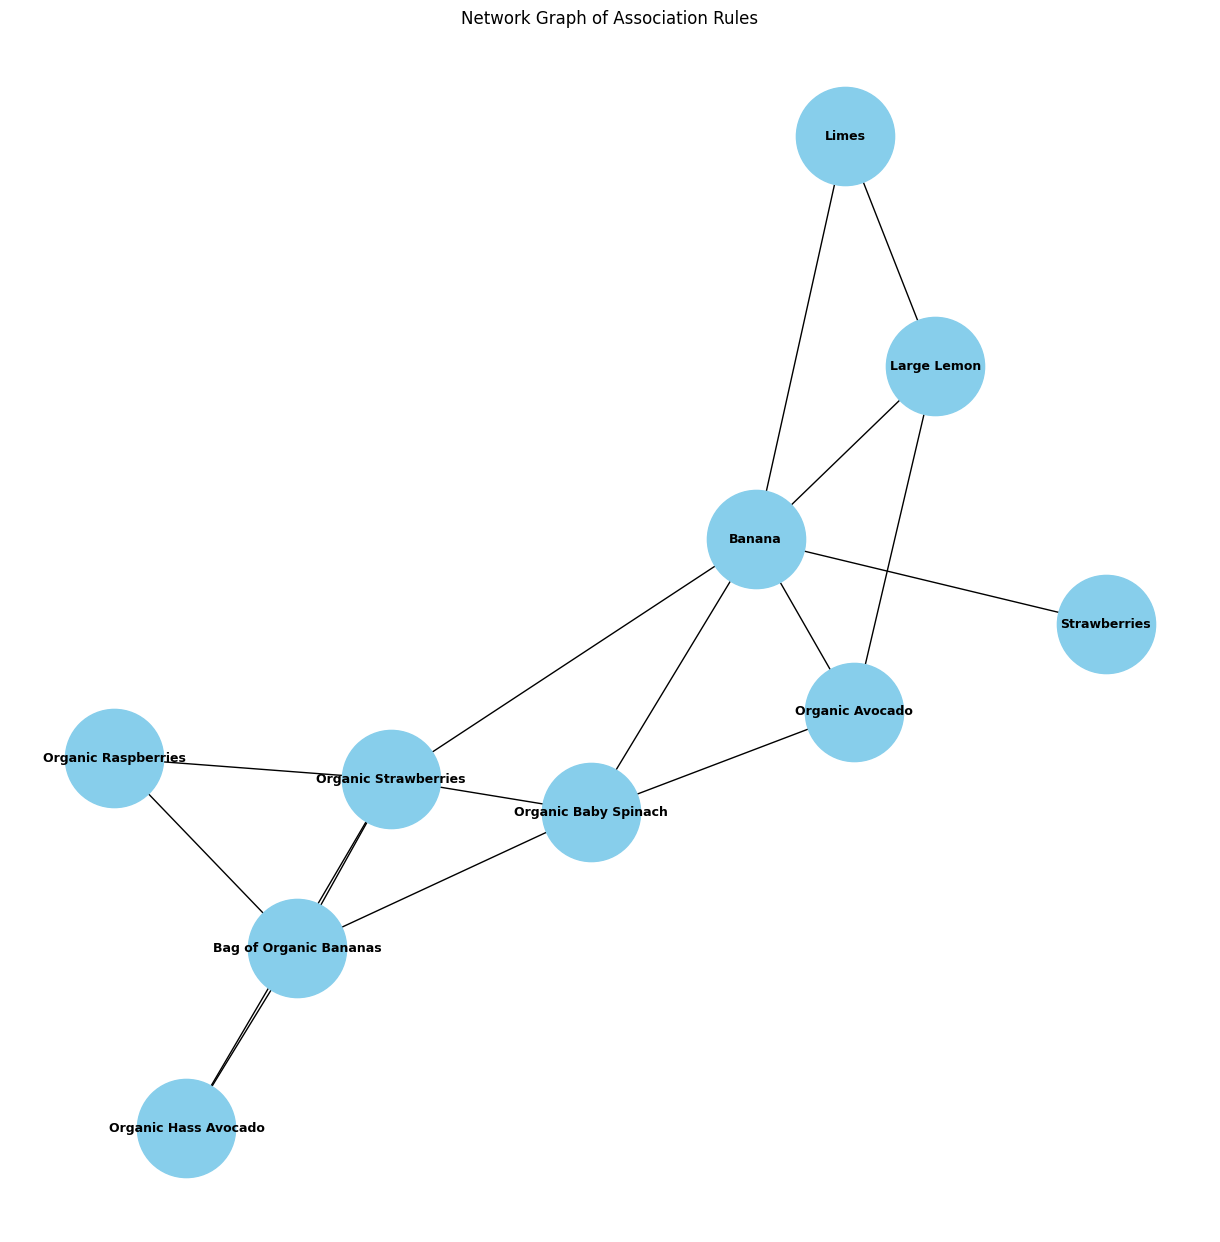

In [22]:
#visualise the results

import networkx as nx
import matplotlib.pyplot as plt

# Ensure antecedents and consequents are in a suitable format if they're not already
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a graph from the DataFrame
G = nx.from_pandas_edgelist(
    rules,
    source='antecedents',
    target='consequents',
    edge_attr=True
)

# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # k regulates the distance between nodes
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=9, font_weight='bold')
plt.title('Network Graph of Association Rules')
plt.show()


In [ ]:
#The network graph you've created visualizes the association rules between various products based on their co-purchase patterns


In [ ]:
#From the graph, it appears that certain products, such as "Bag of Organic Bananas" and "Banana," serve as central nodes. These central nodes likely have high degrees, indicating they are frequently purchased with many other items. This can suggest a couple of strategic points:
#Cross-Marketing Strategies: Products connected to these central nodes might be excellent candidates for cross-promotional marketing. Since these items are frequently bought together, marketing them next to each other or in bundled offers could potentially increase sales.
#Inventory and Supply Chain Management: Central nodes, due to their connectivity and frequency of purchase, might require careful inventory management to ensure that they are always in stock, as running out could impact the sales of connected items.

In [ ]:
#Seeing items like "Organic Raspberries," "Organic Strawberries," and "Organic Baby Spinach" closely linked could also reflect consumer preferences for organic products, indicating a trend towards health-conscious shopping. This can be particularly useful for:
#Marketing and Product Development: Such insights could drive marketing campaigns focused on health and wellness themes and guide product development or procurement towards more organic and health-focused items.

In [ ]:
#strawberry node appears relatively isolated. This product might need targeted promotions to increase their visibility or paired offers with more popular items to boost sales

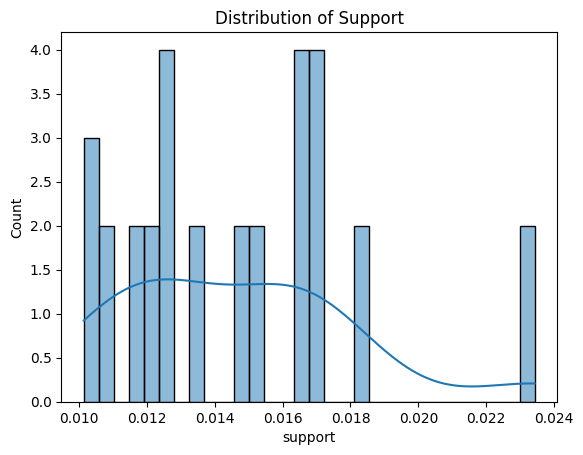

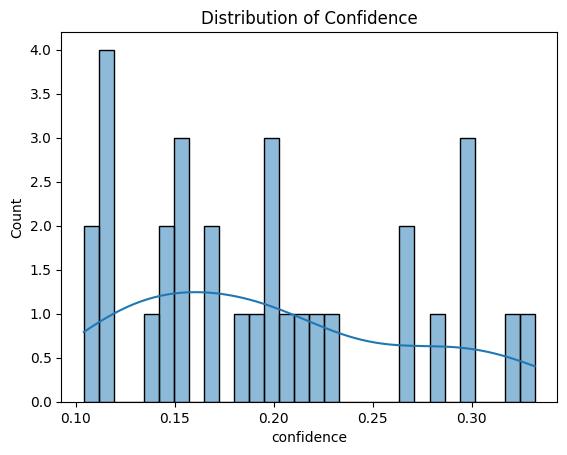

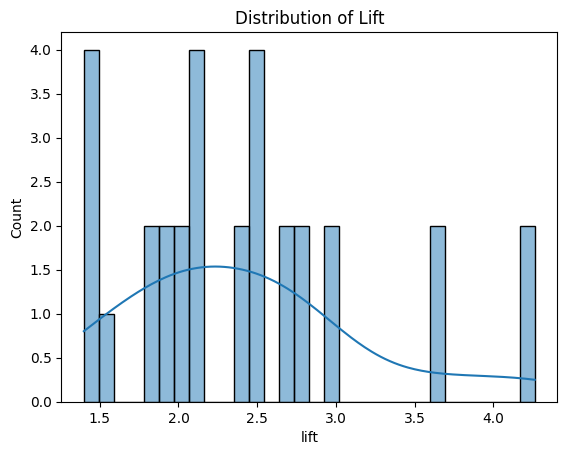

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rules' is your DataFrame
sns.histplot(data=rules, x='support', bins=30, kde=True)
plt.title('Distribution of Support')
plt.show()

sns.histplot(data=rules, x='confidence', bins=30, kde=True)
plt.title('Distribution of Confidence')
plt.show()

sns.histplot(data=rules, x='lift', bins=30, kde=True)
plt.title('Distribution of Lift')
plt.show()



In [ ]:
#Distribution of Support
#Observation: The histogram shows that most rules have relatively low support, with several peaks at various levels. The most common supports seem to cluster around values just below 0.02.
#Interpretation: Support measures how frequently the itemset appears in the dataset. Low support values across most rules indicate that most item combinations do not occur very frequently relative to the number of transactions. This can be typical in large datasets with diverse products. Focusing on itemsets with support near the peaks might help in targeting the most commonly purchased combinations.

In [ ]:
#Distribution of Confidence
#Observation: Confidence values are spread out, with peaks around 0.15 and some higher confidence levels up to about 0.3.
#Interpretation: Confidence indicates how often the rule has been found to be true. The spread of confidence values suggests variability in how often products in the antecedent part of a rule lead to products in the consequent part. Higher confidence peaks indicate stronger predictive power but are less frequent. Strategies could focus on these higher confidence rules for promoting products together, as they are more likely to result in the consequent product being purchased.

In [ ]:
#Distribution of Lift
#Observation: The lift values show several peaks and troughs, with many rules having a lift close to 1 but others ranging up to about 4.
#Interpretation: Lift measures how much more often the antecedent and consequent of a rule occur together than expected if they were statistically independent. A lift greater than 1 suggests a positive relationship between the antecedent and consequent. Peaks in the higher lift values indicate particularly strong relationships that are potentially exploitable in marketing strategies. Rules with higher lift can be used to identify product pairs that might be effectively marketed together.

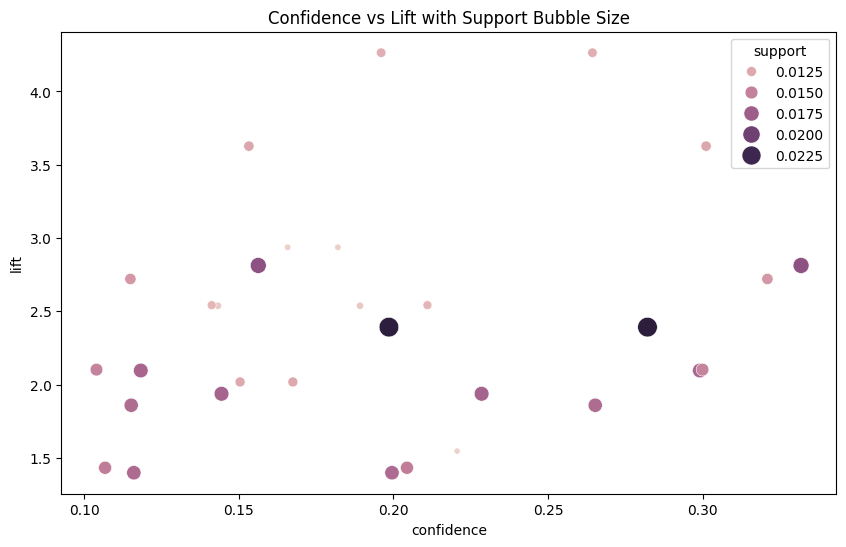

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', size='support', hue='support', sizes=(20, 200))
plt.title('Confidence vs Lift with Support Bubble Size')
plt.show()



In [21]:
!pip install networkx


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 445.2 kB/s eta 0:00:04
   ------------- -------------------------- 0.6/1.7 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 13.5 MB/s eta 0:00:00


In [ ]:
#part A - Question 2

#1. Targeted Cross-Promotional Campaigns
#Recommendation:
#Implement targeted cross-promotional and co-marketing campaigns focusing on product pairs or clusters with high lift and confidence scores.

#Justification:
#The analysis reveals certain product combinations that are purchased together more frequently than would be expected by chance (high lift). Products with higher confidence in the rules suggest that the purchase of one product strongly influences the purchase of another. Leveraging these insights can help create effective marketing campaigns that increase customer basket size and enhance the overall shopping experience.

#Implementation Steps:

#Identify Key Product Pairs: Use the association rules with the highest lift values to identify product pairs that influence each other's purchase strongly. For instance, if "Organic Bananas" and "Organic Avocado" have a high lift and confidence, these should be considered for joint promotions.
#Design Campaigns: Develop marketing materials that highlight these product pairs, such as special offers, discounts when bought together, or displaying them next to each other in-store and online.
#Test and Iterate: Launch small-scale test campaigns to measure the effectiveness of cross-promotions. Use customer feedback and sales data to refine the approach before a full-scale rollout.


#2. Dynamic Personalization in Online and Mobile Shopping Environments
#Recommendation:
#Integrate a dynamic recommendation system into the online and mobile shopping platforms that utilize these association rules to suggest products that other customers frequently buy together.

#Justification:
#The confidence metric indicates how often products are bought together, providing a robust basis for recommendations. By suggesting items that other customers frequently purchase together (as identified by the rules with high confidence and lift), the company can enhance user experience, promote product discovery, and potentially increase the average transaction value.

#Implementation Steps:

#Develop Recommendation Algorithms: Incorporate the association rules into the recommendation algorithms that power suggestions on product pages, in the shopping cart, or during the checkout process.
#Personalize User Experiences: Utilize customer purchase history and browsing behavior to tailor the recommendations further. For example, if a customer adds "Bag of Organic Bananas" to their cart, the system could suggest adding "Organic Baby Spinach" if those two items are frequently bought together.
#Feedback Loop: Continuously refine the recommendations based on customer interaction (which suggestions are accepted or ignored) to improve the accuracy and relevance of the suggestions.
#Overall Business Impact
#Both recommendations aim to leverage the inherent connections between products as identified through data analysis to drive sales growth, improve customer engagement, and enhance the shopping experience. By making the shopping process more intuitive and aligned with customer habits, the company can not only increase immediate sales but also customer loyalty and satisfaction in the long term.